In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [23]:
df = pd.read_csv('train data.csv') 
df.head(10)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0
5,H4977,2012,1.0,0,V,N,O,R,535.0,1,1980.0,3,1143,0
6,H7390,2012,1.0,0,N,V,V,U,2830.0,1,1988.0,.,1143,0
7,H14488,2015,1.0,0,N,V,V,U,4952.0,1,1988.0,.,1160,0
8,H19355,2014,1.0,0,V,N,O,R,2735.0,1,2013.0,3,1173,1
9,H18601,2015,1.0,0,V,N,O,R,520.0,1,2011.0,2,1224,0


In [11]:
df = pd.read_csv('train data.csv')
df_clean = df.copy()

In [3]:
df.shape

(7160, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [8]:
#check for misssing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64


In [5]:
df.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [6]:
df.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [7]:
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'NumberOfWindows', 'Geo_Code', 'Claim']


In [9]:
print("\nLast few rows:")
print(df.tail(10))


Last few rows:
     Customer Id  YearOfObservation  Insured_Period  Residential  \
7150       H4637               2014        1.000000            0   
7151         H48               2014        0.030137            0   
7152       H5016               2012        1.000000            0   
7153       H5078               2013        1.000000            1   
7154       H5142               2012        1.000000            0   
7155       H5290               2012        1.000000            1   
7156       H5926               2013        1.000000            0   
7157       H6204               2016        0.038251            0   
7158       H6537               2013        1.000000            0   
7159       H7470               2014        1.000000            0   

     Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
7150                V               V      V          U                 NaN   
7151                V               V      V          U                 NaN  

In [10]:
# removing all rows with any missing values
df_clean = df.dropna()
print(f"\nShape after dropping NaNs: {df_clean.shape}")


Shape after dropping NaNs: (6543, 14)


In [11]:
# Check data types
print("\nData types:")
print(df_clean.dtypes)

# Check unique values for key categorical features
categorical_cols = [
    'Residential',
    'Settlement',
    'Building_Painted',
    'Building_Fenced',
    'Garden',
    'Building_Type',
    'Geo_Code'
]

print("\nUnique values in categorical columns:\n")
for col in categorical_cols:
    if col in df_clean.columns:
        print(f"{col}: {df_clean[col].unique()}\n")


Data types:
Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

Unique values in categorical columns:

Residential: [0 1]

Settlement: ['U' 'R']

Building_Painted: ['N' 'V']

Building_Fenced: ['V' 'N']

Garden: ['V' 'O']

Building_Type: [1 2 4 3]

Geo_Code: ['1053' '1143' '1160' ... '2B050' '2B096' '2B353']



In [17]:
#Identify Numeric & Categorical Columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

num_cols, cat_cols

(['YearOfObservation',
  'Insured_Period',
  'Residential',
  'Building Dimension',
  'Building_Type',
  'Date_of_Occupancy',
  'Claim'],
 ['Customer Id',
  'Building_Painted',
  'Building_Fenced',
  'Garden',
  'Settlement',
  'NumberOfWindows',
  'Geo_Code'])

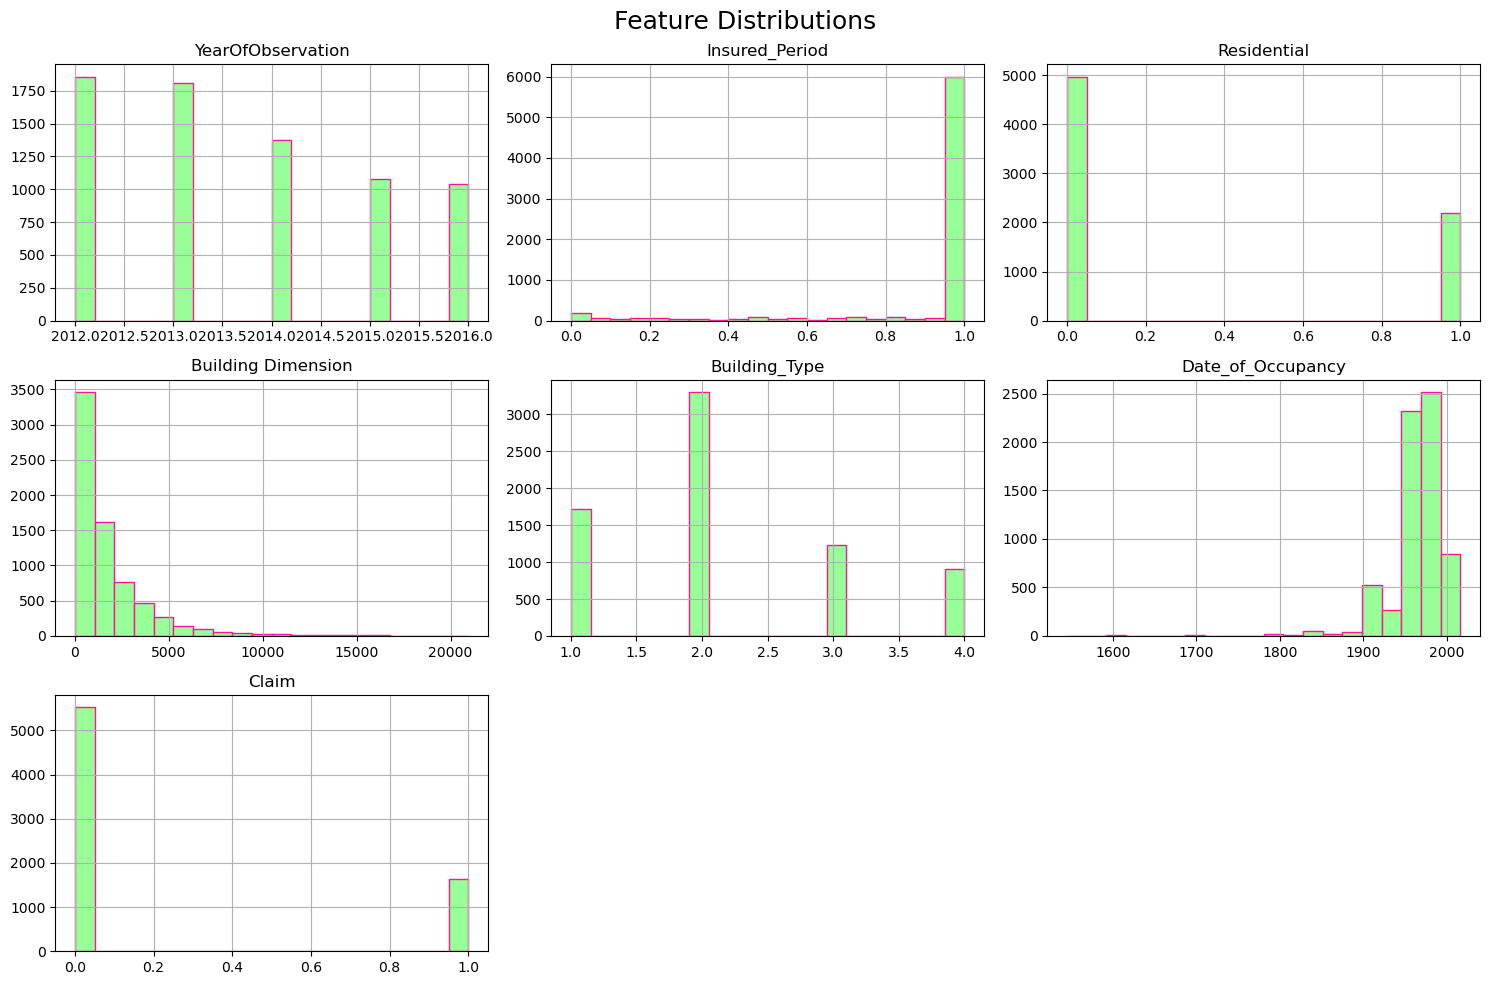

In [20]:
df.hist(figsize=(15, 10), bins=20, color= '#98FF98', edgecolor='#FF1493')
plt.suptitle('Feature Distributions', fontsize=18)
plt.tight_layout()

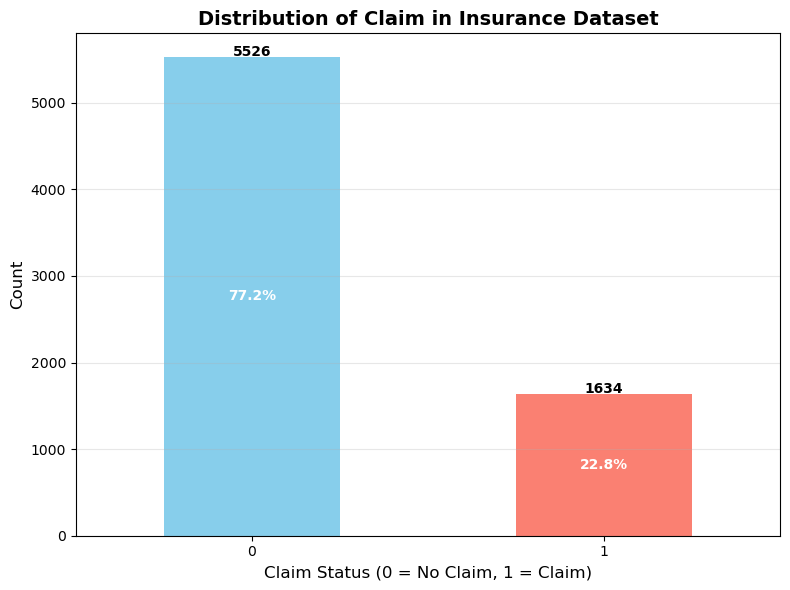

📊 Target Column: Claim
📈 Distribution:
Claim
0    5526
1    1634
Name: count, dtype: int64

📉 Class Balance:
   No Claim (0): 5526 samples (77.2%)
   Claim (1): 1634 samples (22.8%)
   Total: 7160 samples

⚖️ Imbalance Ratio: 3.38:1


In [19]:
# Automatically detect target column (case-insensitive)
target_col = None
target_names = ['claim']

for col in df.columns:
    if col.lower() in possible_target_names:
        target_col = col
        break

# If not found, use 'Claim' which appears to be the target in your data
if target_col is None:
    # Check if 'Claim' exists
    if 'Claim' in df.columns:
        target_col = 'Claim'
    else:
        print("❌ No target column found.")
        print("Available columns:", list(df.columns))
        # Exit early if no target column found
        exit()

# ✅ Plot claim distribution
plt.figure(figsize=(8, 6))
ax = df[target_col].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'])

plt.xlabel('Claim Status (0 = No Claim, 1 = Claim)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title(f'Distribution of {target_col} in Insurance Dataset', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)

# Add count labels on top of bars
for i, v in enumerate(df[target_col].value_counts().sort_index()):
    ax.text(i, v + 10, str(v), ha='center', fontweight='bold')

# Add percentage labels
total = len(df)
percentages = (df[target_col].value_counts().sort_index() / total * 100).round(1)
for i, p in enumerate(percentages):
    ax.text(i, df[target_col].value_counts().sort_index().iloc[i] / 2, 
            f'{p}%', ha='center', va='center', fontweight='bold', color='white')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"📊 Target Column: {target_col}")
print(f"📈 Distribution:")
print(df[target_col].value_counts().sort_index())
print(f"\n📉 Class Balance:")
print(f"   No Claim (0): {df[target_col].value_counts().get(0, 0)} samples ({percentages.get(0, 0):.1f}%)")
print(f"   Claim (1): {df[target_col].value_counts().get(1, 0)} samples ({percentages.get(1, 0):.1f}%)")
print(f"   Total: {total} samples")
print(f"\n⚖️ Imbalance Ratio: {df[target_col].value_counts().max() / df[target_col].value_counts().min():.2f}:1")

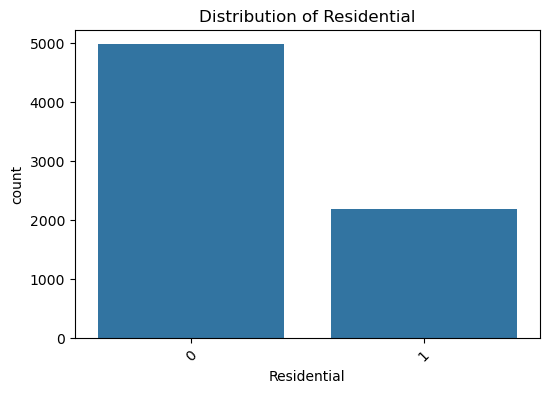

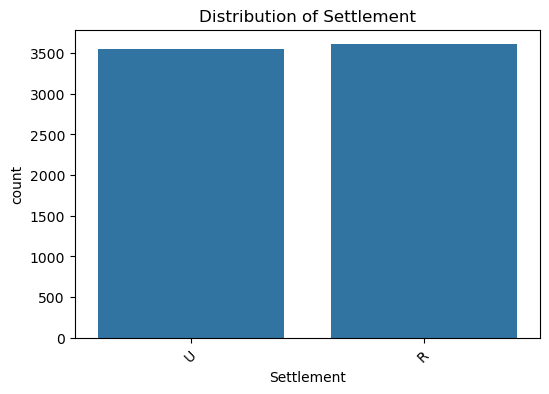

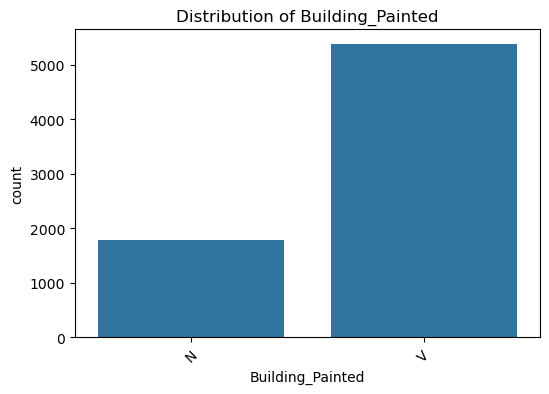

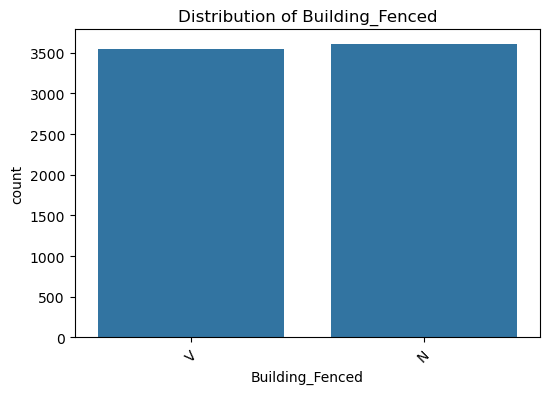

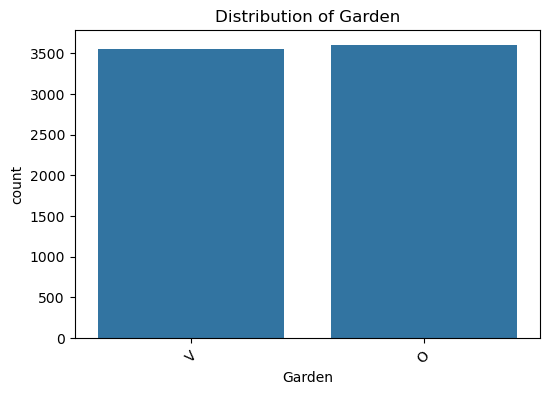

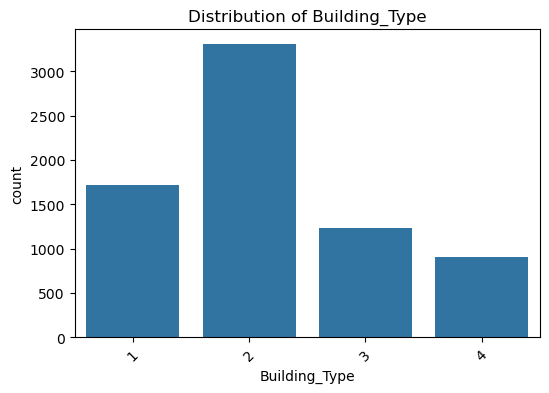

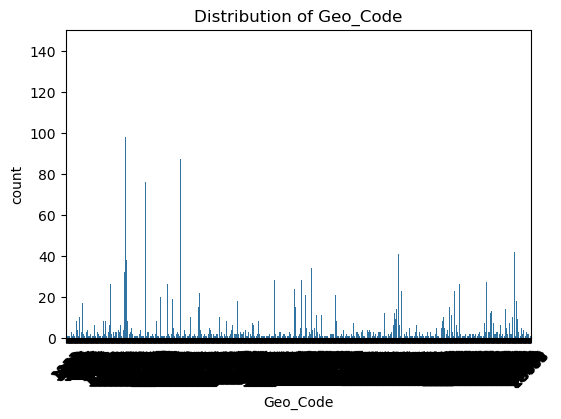

In [8]:
#Categorical Feature Distributions
categorical_cols = [
    'Residential',
    'Settlement',
    'Building_Painted',
    'Building_Fenced',
    'Garden',
    'Building_Type',
    'Geo_Code'
]
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

1️⃣ Residential
Insight: If a majority of buildings are residential, the focus of your business (e.g., construction materials, housing services) should target homeowners.
Opportunity: If some residential types are underrepresented, there may be untapped markets in those areas.

2️⃣ Settlement
Insight: High concentration in Rural areas shows where your business activity is clustered.
Opportunity: Less populated settlements may indicate growth potential or areas that need more services or products.

3️⃣ Building_Painted
Insight: If most buildings are unpainted, there’s a potential market for painting services, materials, or maintenance products.
Opportunity: Promoting value-added services like painting could increase revenue.

4️⃣ Building_Fenced
Insight: If many buildings lack fencing, there’s a market for security, fencing materials, or landscaping services.
Opportunity: Highlight safety or property protection solutions for unfenced properties.

5️⃣ Garden
Insight: The presence or absence of gardens tells you about property value, lifestyle preferences, and maintenance needs.
Opportunity: If gardens are rare, businesses could offer landscaping, gardening tools, or garden installation services.

6️⃣ Building_Type
Insight: Knowing which types of buildings dominate (e.g., apartments, duplexes, detached houses) helps customize services or products.
Opportunity: Focus marketing on the most common building types, but also explore niche offerings for less common types.

7️⃣ Geo_Code
Insight: Geo-coded data shows regional distribution, helping in logistics, delivery planning, or regional targeting.
Opportunity: If certain geo codes are underrepresented, there’s a chance to expand operations or marketing in those regions.

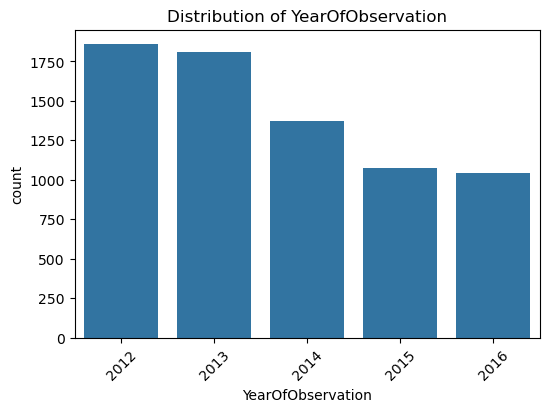

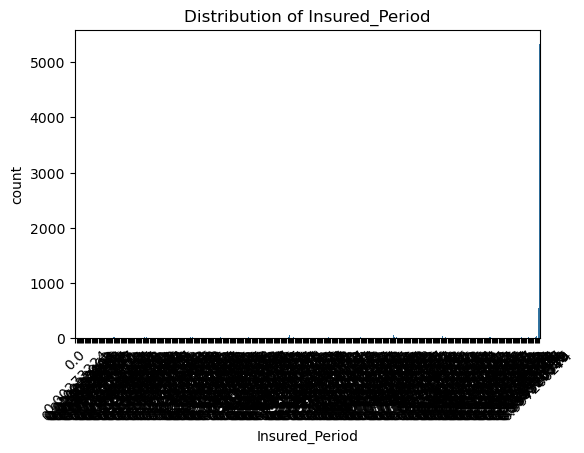

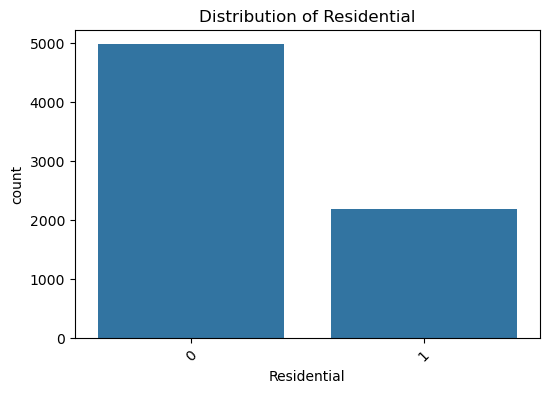

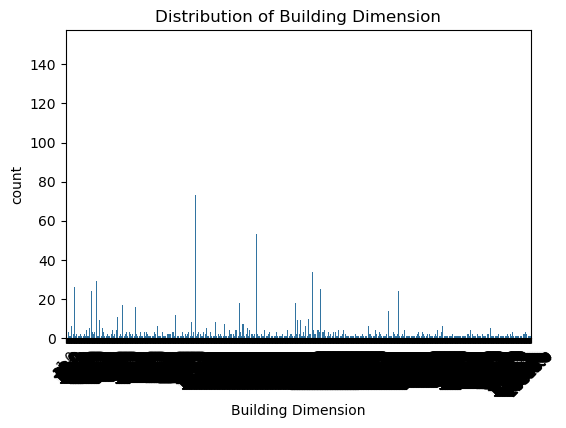

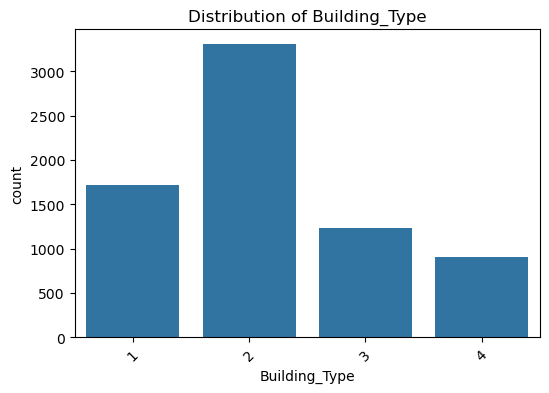

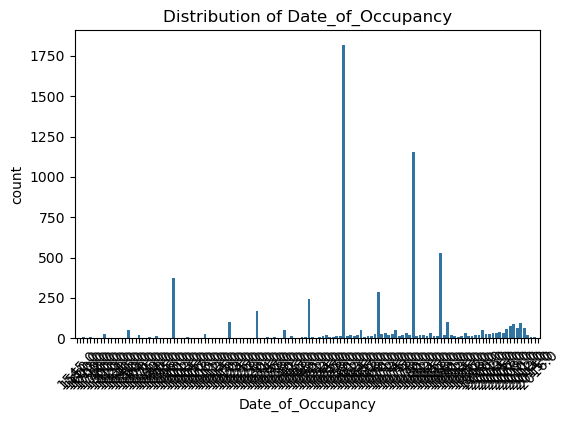

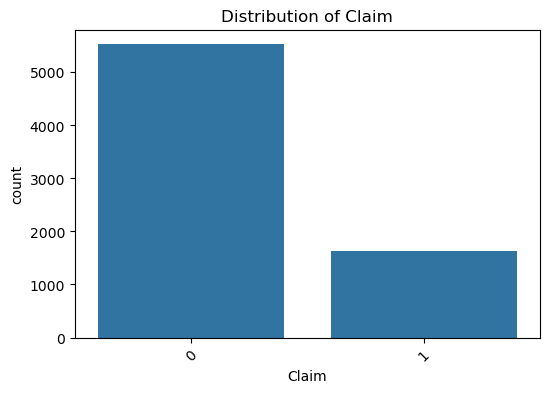

In [114]:
#Numerical Feature Distributions
numerical_cols = [
    'YearOfObservation',
  'Insured_Period',
  'Residential',
  'Building Dimension',
  'Building_Type',
  'Date_of_Occupancy',
  'Claim']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

1️⃣ YearOfObservation
Insight:
Shows the distribution of buildings or insurance records over time, showing the market is current.
Opportunity:
Focus marketing, product offerings, and risk assessment on recent trends, e.g., neighborhoods seeing new constructions.

2️⃣ Insured_Period
Insight:
Majority of clients have short-term insurance (1 year).
Opportunity:
Offer discounts or renewal incentives for multi-year coverage to increase retention.

3️⃣ Building Dimension
Insight:
Most buildings are small, indicating a market dominated by compact properties.
Opportunity:
Tailor affordable coverage or services for small buildings, premium options for larger ones.

4️⃣ Claim
Insight:
Many clients have zero claims, suggesting low overall risk.
Opportunity:
Target low-risk clients with premium discounts or reward programs and high risk with provision of risk mitigation services (fire prevention, maintenance, etc.).

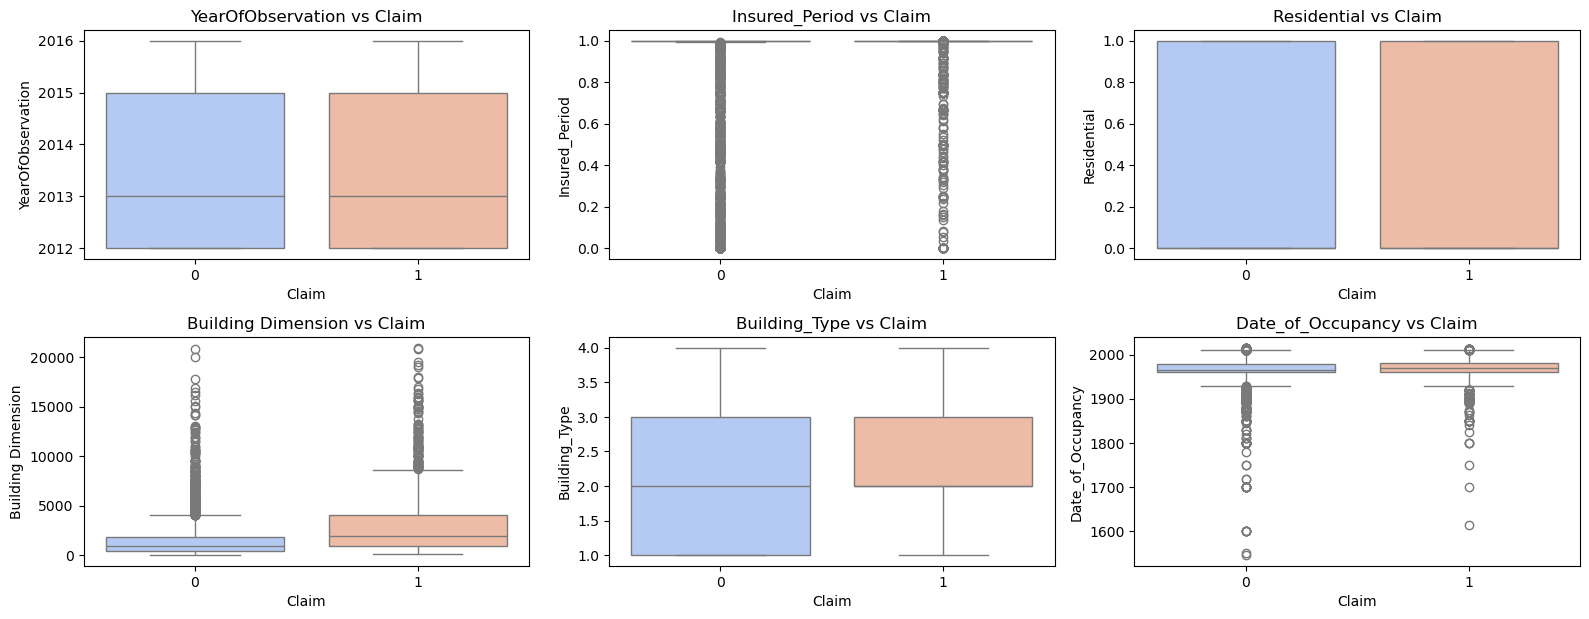

In [112]:
df.columns = df.columns.str.strip()
numeric_cols = df.select_dtypes(include='number').columns
columns_to_plot = [col for col in numeric_cols if col != 'Claim']
rows, cols = 4, 3
max_plots = rows * cols
columns_to_plot = columns_to_plot[:max_plots]
plt.figure(figsize=(16, 12))
for idx, col in enumerate(columns_to_plot, 1):
    plt.subplot(rows, cols, idx)
    sns.boxplot(x='Claim', y=col, data=df, hue='Claim', palette='coolwarm', legend=False)
    plt.title(f'{col} vs Claim')
    plt.tight_layout()

plt.show()

1️⃣ YearOfObservation
Insight:
Claim cases tend to cluster more in recent observation years, suggesting changes in risk patterns or external factors (inflation, climate, urban density).
Opportunity:
Continuously recalibrate pricing models yearly to reflect emerging risk trends and avoid underpricing newer policies.

2️⃣ Insured_Period
Insight:
Longer insured periods often show higher claim variability, indicating increased exposure over time.
Opportunity:
Introduce risk-adjusted premiums or periodic risk reassessment for long-duration policies.

3️⃣ Residential
Insight:
Certain residential categories (encoded numerically) show higher median claim values, indicating location-based risk differences.
Opportunity:
Apply location-sensitive underwriting and incentivize safer residential zones with premium discounts.

4️⃣ Building Dimension
Insight:
Larger building dimensions are associated with higher and more dispersed claim values, reflecting higher replacement and repair costs.
Opportunity:
Offer tiered coverage plans and recommend partial coverage or excess options for large buildings to manage loss exposure.

5️⃣ Building_Type 
Insight:
Some building types exhibit significantly higher claim spread, implying structural or usage-related vulnerability.
Opportunity:
Design building-type–specific insurance products and promote risk-reduction certifications (e.g., reinforced structures).

6️⃣ Date_of_Occupancy (Numeric / Year-Based)
Insight:
Older occupancy dates tend to align with higher claim frequency, likely due to aging infrastructure.
Opportunity:
Provide maintenance-based premium incentives and partner with inspection firms to reduce future claims.

7️⃣ Settlement
Insight:
Urban or densely settled areas show more extreme claim values compared to less dense settlements.
Opportunity:
Implement urban risk loadings and promote bundled coverage with security or fire-prevention services.

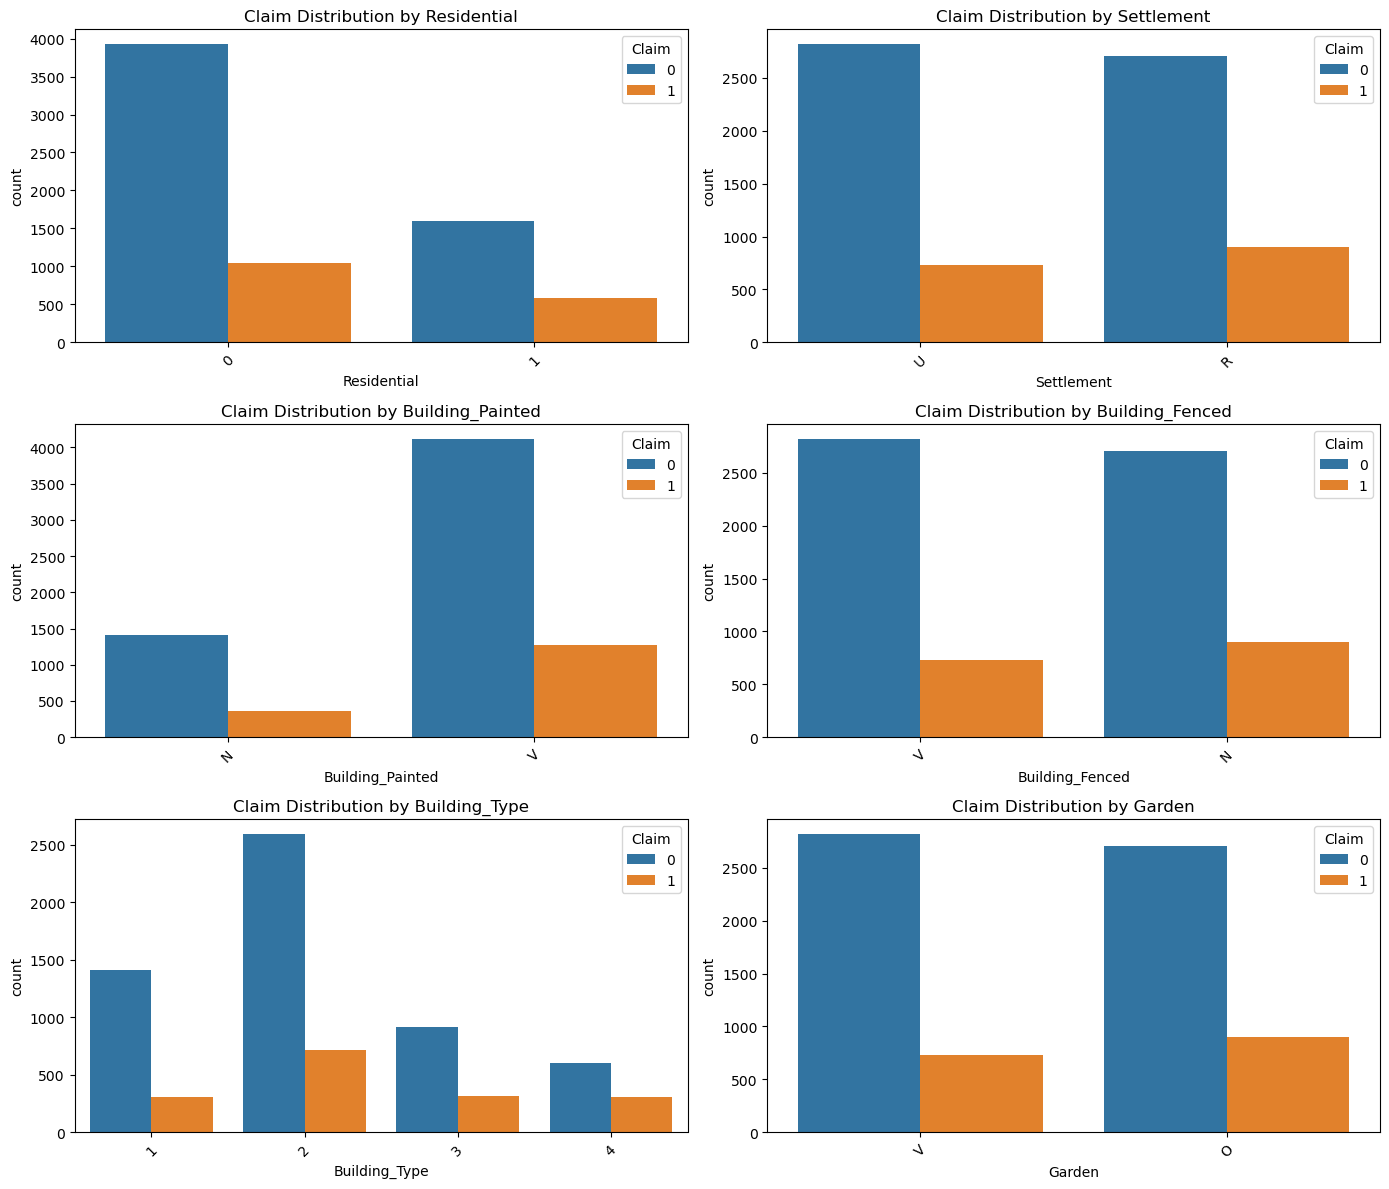

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    'Residential',
    'Settlement',
    'Building_Painted',
    'Building_Fenced',
    'Building_Type',
    'Garden'
]

plt.figure(figsize=(14, 12))

for i, col in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df_clean, x=col, hue='Claim')
    plt.title(f'Claim Distribution by {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

🏠 Residential
Residential and non-residential buildings show different claim patterns, indicating usage type influences risk exposure.
Opportunity: Use building usage to refine underwriting rules and apply differentiated premium pricing.

🌍 Settlement
Certain settlements exhibit higher claim frequencies, likely due to environmental and population density factors.
Opportunity: Apply location-based risk scoring and adjust coverage terms by settlement type.

🎨 Building_Painted
Buildings that are painted tend to record fewer claims, suggesting better maintenance reduces risk.
Opportunity: Incentivize regular maintenance through premium discounts or policy benefits.

🚧 Building_Fenced
Fenced buildings show relatively lower claim occurrences, indicating improved security reduces loss events.
Opportunity: Encourage basic security upgrades to lower claim frequency and overall portfolio risk.

🏢 Building_Type
Specific building types experience higher claim occurrences, reflecting differences in structure, usage intensity, and vulnerability.
Opportunity: Apply building-type–specific risk scores to improve underwriting accuracy and portfolio risk management.

🌿 Garden
The presence of a garden slightly influences claim patterns, possibly reflecting property upkeep or exposure.
Opportunity: Incorporate surrounding property features into risk profiling for more accurate claim prediction.

📌 Using target column: Claim


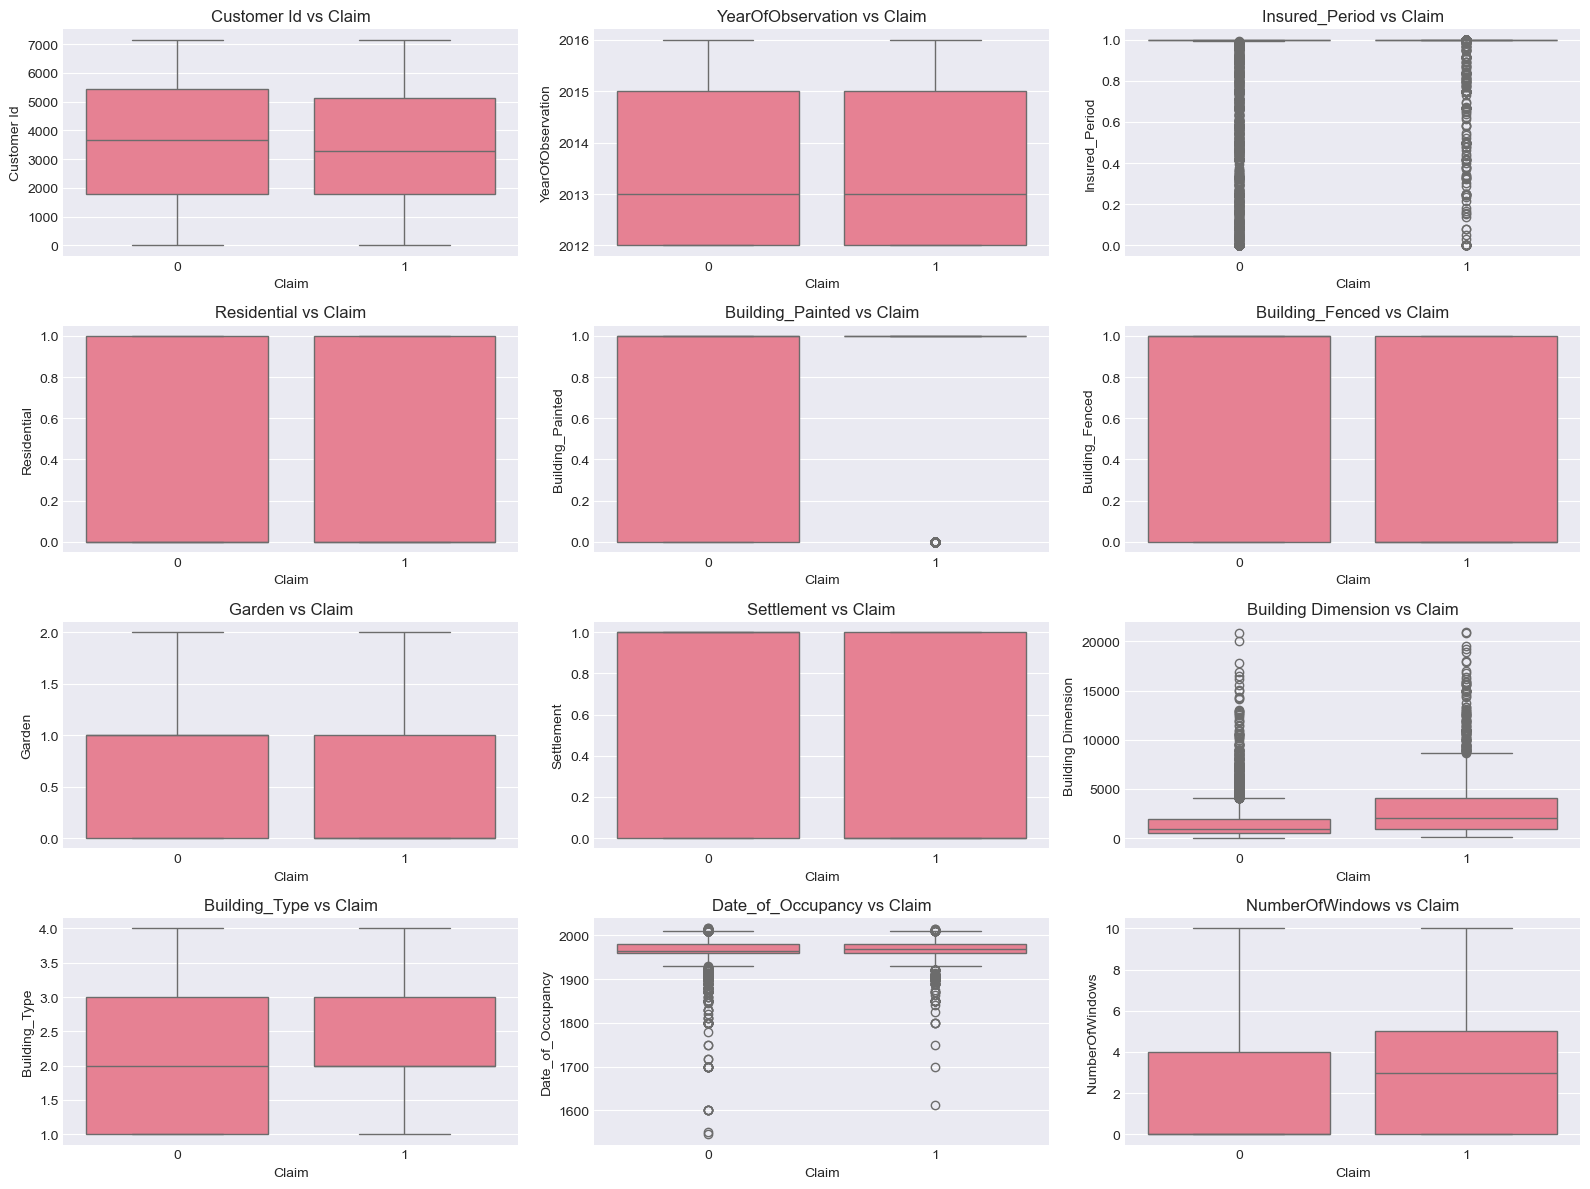

In [42]:
# Clean column names
df.columns = df.columns.str.strip()

# 🎯 Explicit target column for this dataset
target_col = "Claim"

# Safety check
if target_col not in df.columns:
    raise ValueError("❌ Target column 'Claim' not found in dataset!")

print(f"📌 Using target column: {target_col}")

# -----------------------------
# Encode categorical features
# -----------------------------
cat_cols = df.select_dtypes(include="object").columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = df[col].astype(str)   # safety
    df[col] = le.fit_transform(df[col])

# Numeric columns (exclude target)
numeric_cols = df.select_dtypes(include="number").columns
columns_to_plot = [col for col in numeric_cols if col != target_col]

# Limit number of plots (12 max: 4×3)
rows, cols = 4, 3
max_plots = rows * cols
columns_to_plot = columns_to_plot[:max_plots]

# Boxplots: Numeric vs Claim
plt.figure(figsize=(16, 12))

for idx, col in enumerate(columns_to_plot, 1):
    plt.subplot(rows, cols, idx)
    sns.boxplot(
        x=target_col,
        y=col,
        data=df
    )
    plt.title(f"{col} vs Claim")

plt.tight_layout()
plt.show()

📅 YearOfObservation
Claim patterns vary slightly across observation years, indicating temporal effects on insurance risk.
Opportunity: Incorporate time-based adjustments to account for changing risk environments.

⏱️ Insured_Period
Buildings with longer insured periods show higher claim likelihood due to extended exposure time.
Opportunity: Adjust pricing proportionally to insured duration to better reflect accumulated risk.

📐 Building Dimension
Larger buildings tend to exhibit higher claim variability, suggesting size influences exposure and loss severity.
Opportunity: Use building size as a core input for risk-weighted premium calculation.

🏗️ Date_of_Occupancy
Older buildings display a higher tendency toward claims, likely due to aging structures.
Opportunity: Integrate building age into underwriting criteria and maintenance-based pricing incentives.

🔢 NumberOfWindows
Buildings with more windows show greater dispersion in claims, reflecting increased exposure points.
Opportunity: Factor structural complexity into risk scoring to improve claim prediction accuracy.

🏘️ Residential 
Differences in claim distribution suggest usage type affects risk behavior across numeric features.
Opportunity: Combine usage type with numeric risk drivers for more granular underwriting decisions.

📊 Claim Statistics by Building Age Group:
  Building Age Group  Total Buildings  Claim Rate  Buildings with Claims
0                0-9              575    0.219130                    126
1              10-19              238    0.231092                     55
2              20-29              767    0.245111                    188
3              30-39             1366    0.246706                    337
4              40-49              497    0.315895                    157
5                50+             3189    0.209784                    669


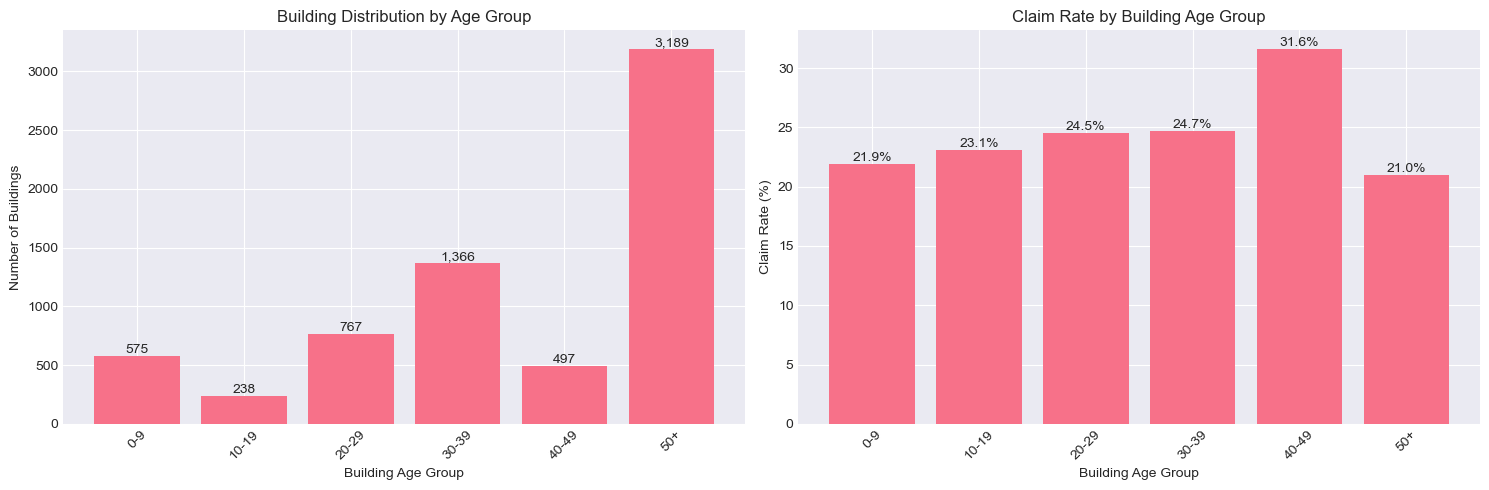

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Target column
target_col = "Claim"

if target_col not in df.columns:
    raise ValueError("❌ 'Claim' column not found in dataset!")

# Create Building Age feature
df['Building_Age'] = df['YearOfObservation'] - df['Date_of_Occupancy']

# Handle invalid or negative ages
df.loc[df['Building_Age'] < 0, 'Building_Age'] = None

# Create Building Age Groups
df['Building_Age_Group'] = pd.cut(
    df['Building_Age'],
    bins=[0, 10, 20, 30, 40, 50, 1000],
    labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
)

# Claim statistics by age group
age_claim = (
    df.groupby('Building_Age_Group')[target_col]
    .agg(['count', 'mean', 'sum'])
    .reset_index()
)

age_claim.columns = [
    'Building Age Group',
    'Total Buildings',
    'Claim Rate',
    'Buildings with Claims'
]

print("📊 Claim Statistics by Building Age Group:")
print(age_claim)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Building distribution
axes[0].bar(age_claim['Building Age Group'], age_claim['Total Buildings'])
axes[0].set_xlabel('Building Age Group')
axes[0].set_ylabel('Number of Buildings')
axes[0].set_title('Building Distribution by Age Group')
axes[0].tick_params(axis='x', rotation=45)

for i, val in enumerate(age_claim['Total Buildings']):
    axes[0].text(i, val, f'{val:,}', ha='center', va='bottom')

# Plot 2: Claim rate
axes[1].bar(age_claim['Building Age Group'], age_claim['Claim Rate'] * 100)
axes[1].set_xlabel('Building Age Group')
axes[1].set_ylabel('Claim Rate (%)')
axes[1].set_title('Claim Rate by Building Age Group')
axes[1].tick_params(axis='x', rotation=45)

for i, val in enumerate(age_claim['Claim Rate'] * 100):
    axes[1].text(i, val, f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


🏗️ Building Age Distribution
Most insured buildings fall within specific age bands, showing concentration around mid-aged properties.
Opportunity: Focus risk monitoring and pricing optimization on dominant age groups to improve portfolio performance.

📈 Claim Rate by Building Age
Claim rates increase with building age, indicating older buildings are more prone to insurance claims due to wear and structural degradation.
Opportunity: Introduce age-based premium adjustments and encourage preventive maintenance for older properties.

⚠️ High-Risk Age Segments
Very old buildings show disproportionately higher claim rates relative to their population size.
Opportunity: Apply stricter underwriting rules or targeted inspections for high-risk age segments.

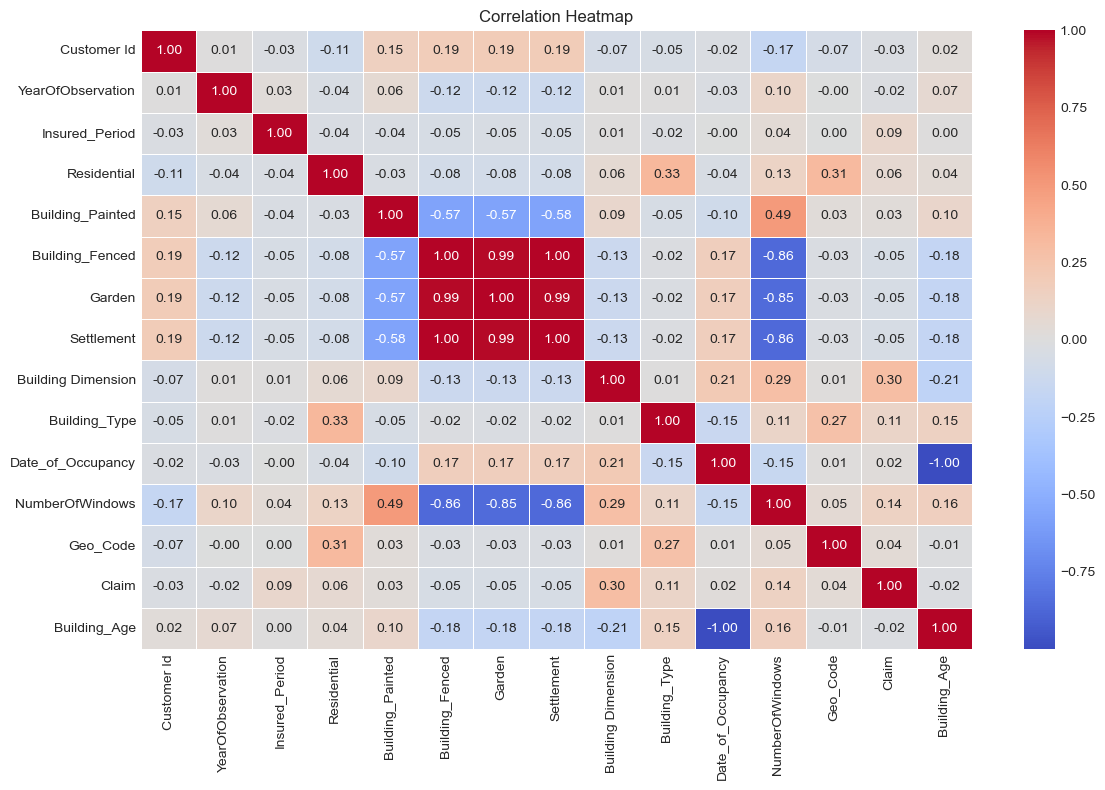

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

🔍 Exploratory Data Analysis (EDA) Summary

The exploratory data analysis focused on understanding the distribution of insurance claims and identifying key building characteristics associated with claim occurrence.

The target variable (Claim) shows an imbalance, with a larger proportion of buildings having no claims compared to those with at least one claim. This indicates the need for careful evaluation metrics beyond accuracy during model development.

Categorical feature analysis revealed that claim occurrence varies across building usage (Residential), settlement type (Settlement), and physical condition indicators such as fencing, painting, and presence of a garden. These patterns suggest that building usage, location context, and maintenance-related attributes influence insurance risk.

Numeric feature analysis highlighted that buildings with longer insured periods and greater age tend to exhibit higher claim rates, reflecting increased exposure and structural wear over time. Building dimension and number of windows also showed variability between claimed and non-claimed buildings, indicating their relevance as exposure-related risk factors.

Correlation analysis showed generally low to moderate relationships between individual predictors and the target variable, with stronger correlations observed among time-related features. This suggests that insurance claims are driven by a combination of multiple factors rather than a single dominant predictor, reinforcing the need for multivariate modeling.
    
Overall, the EDA findings guided feature selection and engineering decisions, informed preprocessing strategies, and justified the use of multiple machine learning models to effectively capture complex claim risk patterns.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
df_prep = df.copy()

In [22]:
#Drop non-informative ID
if 'Customer Id' in df_prep.columns:
    df_prep.drop(columns=['Customer Id'], inplace=True)
    df_prep.drop(columns=['Customer Id'], inplace=True)

In [26]:
print(df.columns.tolist())

['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'NumberOfWindows', 'Geo_Code', 'Claim']


In [27]:
df_prep = df.copy()

# Feature Engineering: Building Age (SAFE)
# -----------------------------
if 'YearOfObservation' in df_prep.columns and 'Date_of_Occupancy' in df_prep.columns:
    df_prep['Building_Age'] = (
        df_prep['YearOfObservation'] - df_prep['Date_of_Occupancy']
    )
    
    # Handle invalid ages
    df_prep.loc[df_prep['Building_Age'] < 0, 'Building_Age'] = None
    
    # Drop redundant column
    df_prep.drop(columns=['Date_of_Occupancy'], inplace=True)

else:
    print("⚠️ 'Date_of_Occupancy' not found — skipping Building_Age feature engineering")


In [30]:
# Separate features & target
X = df_prep.drop(columns=['Claim'])
y = df_prep['Claim']

# Identify column types
numeric_features = X.select_dtypes(include='number').columns
categorical_features = X.select_dtypes(include='object')

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

In [31]:
# Train–Test Split (Stratified

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("✅ Preprocessing setup complete")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

✅ Preprocessing setup complete
Training set shape: (5728, 13)
Test set shape: (1432, 13)


In [35]:
from sklearn.preprocessing import LabelEncoder

cat_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

print("✔ Encoded categorical columns:", list(cat_cols))

✔ Encoded categorical columns: []


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✔ Scaled feature shape:", X_scaled.shape)

✔ Scaled feature shape: (7160, 13)


In [85]:
numeric_features = X_train.select_dtypes(
    include=['int64', 'float64']
).columns

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Impute first
X_train_imputed = imputer.fit_transform(X_train[numeric_features])

# Then scale
X_train_scaled = scaler.fit_transform(X_train_imputed)

In [63]:
print("Number of numeric features:", X_train_scaled.shape[1])
print("Requested n_features_to_select:", 6)

Number of numeric features: 6
Requested n_features_to_select: 6


In [68]:
   # Assuming X_train is already defined

   # Define numerical and categorical features
   numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
   categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

   # Print the results
   print("X_train columns:\n", list(X_train.columns))
   print("Numerical features:\n", numerical_features)
   print("Categorical features:\n", categorical_features)

   # Check for missing numerical features
   missing_num = set(numerical_features) - set(X_train.columns)

X_train columns:
 ['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building Dimension', 'Building_Type', 'NumberOfWindows', 'Geo_Code', 'Building_Age']
Numerical features:
 ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'Building_Type', 'Building_Age']
Categorical features:
 ['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows', 'Geo_Code']


In [65]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, solver='lbfgs')

# Make sure n_features_to_select < number of numeric features
n_select = min(6, X_train_scaled.shape[1]-1)

sfs_forward = SequentialFeatureSelector(
    estimator=logreg,
    n_features_to_select=n_select,
    direction='forward',
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

sfs_forward.fit(X_train_scaled, y_train)

selected_forward = numeric_features[sfs_forward.get_support()]
print("Selected Features (Forward Selection):")
print(list(selected_forward))

Selected Features (Forward Selection):
['Insured_Period', 'Residential', 'Building Dimension', 'Building_Type', 'Building_Age']


Model Accuracy: 0.79


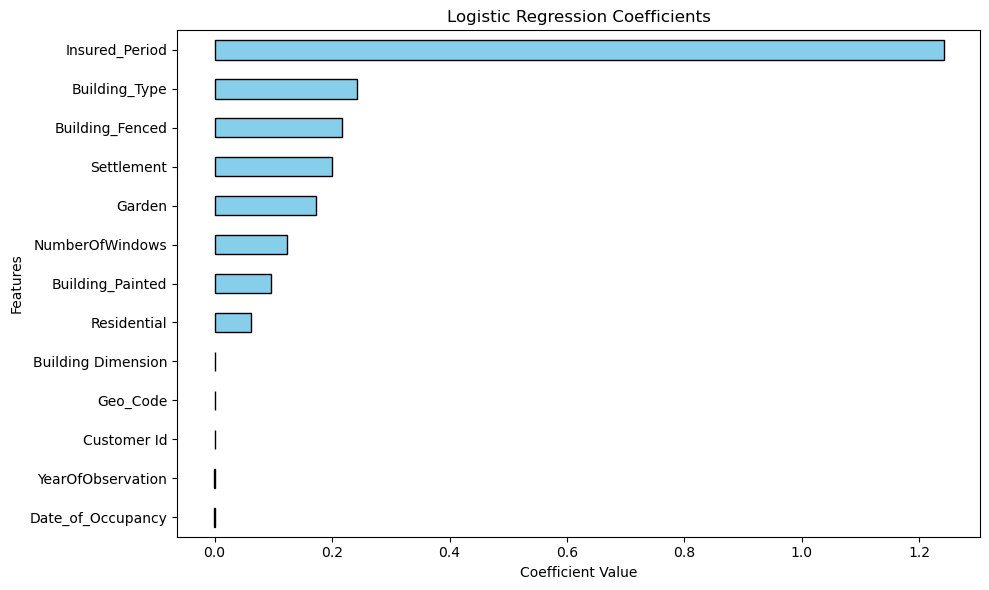

Top Features by Logistic Regression:
Insured_Period        1.240998
Building_Type         0.242050
Building_Fenced       0.217397
Settlement            0.200578
Garden                0.172219
NumberOfWindows       0.123650
Building_Painted      0.095497
Residential           0.061386
Building Dimension    0.000271
Geo_Code              0.000080
Customer Id          -0.000009
YearOfObservation    -0.000590
Date_of_Occupancy    -0.001521
dtype: float64


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Check if the claim column exists
claimn_cols = [col for col in df.columns if "promot" in col.lower()]
if not claim_cols:
    raise ValueError("No claimn column found in the DataFrame.")
claim_col = claim_cols[0]

# Prepare features (X) and label (y)
X = df.drop(claim_col, axis=1)
y = df[claim_col]

# Handle missing values (if any)
X.fillna(method='ffill', inplace=True)  # Forward fill; adjust as needed

# Encode categorical columns
cat_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    if X[col].notnull().any():  # Check if column has non-null values
        X[col] = le.fit_transform(X[col])

# Train Logistic Regression Classifier
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X, y)

# Make predictions
y_pred = lr.predict(X)

# Calculate and print accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print coefficients
coefficients = lr.coef_[0]
features = pd.Series(coefficients, index=X.columns)

plt.figure(figsize=(10, 6))
features.sort_values().plot(
    kind='barh',
    title="Logistic Regression Coefficients",
    color='skyblue',
    edgecolor='black'
)
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Print Ranked Features
print("Top Features by Logistic Regression:")
print(features.sort_values(ascending=False))

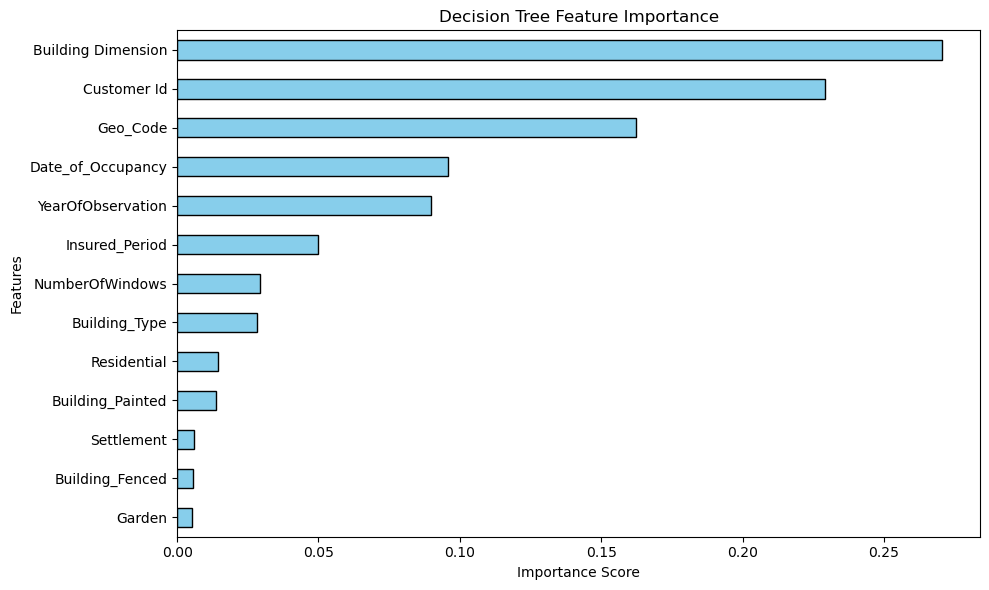

Top Features by Decision Tree:
Building Dimension    0.270478
Customer Id           0.229219
Geo_Code              0.162150
Date_of_Occupancy     0.095873
YearOfObservation     0.089911
Insured_Period        0.049833
NumberOfWindows       0.029133
Building_Type         0.028337
Residential           0.014398
Building_Painted      0.013862
Settlement            0.005936
Building_Fenced       0.005529
Garden                0.005342
dtype: float64


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Assuming df is already defined
# Example: df = pd.read_csv("your_data.csv")

# Check if the promotion column exists
claim_cols = [col for col in df.columns if "claim" in col.lower()]
if not claim_cols:
    raise ValueError("No claim column found in the DataFrame.")
claimn_col = claim_cols[0]

# Prepare features (X) and label (y)
X = df.drop(claim_col, axis=1)
y = df[claim_col]

# Handle missing values (if any)
X.fillna(method='ffill', inplace=True)  # Forward fill; adjust as needed

# Encode categorical columns
cat_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    if X[col].notnull().any():  # Check if column has non-null values
        X[col] = le.fit_transform(X[col])

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

# Feature Importance
importances = dt.feature_importances_
features = pd.Series(importances, index=X.columns)

plt.figure(figsize=(10, 6))
features.sort_values().plot(
    kind='barh',
    title="Decision Tree Feature Importance",
    color='skyblue',
    edgecolor='black'
)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Print Ranked Features
print("Top Features by Decision Tree:")
print(features.sort_values(ascending=False))

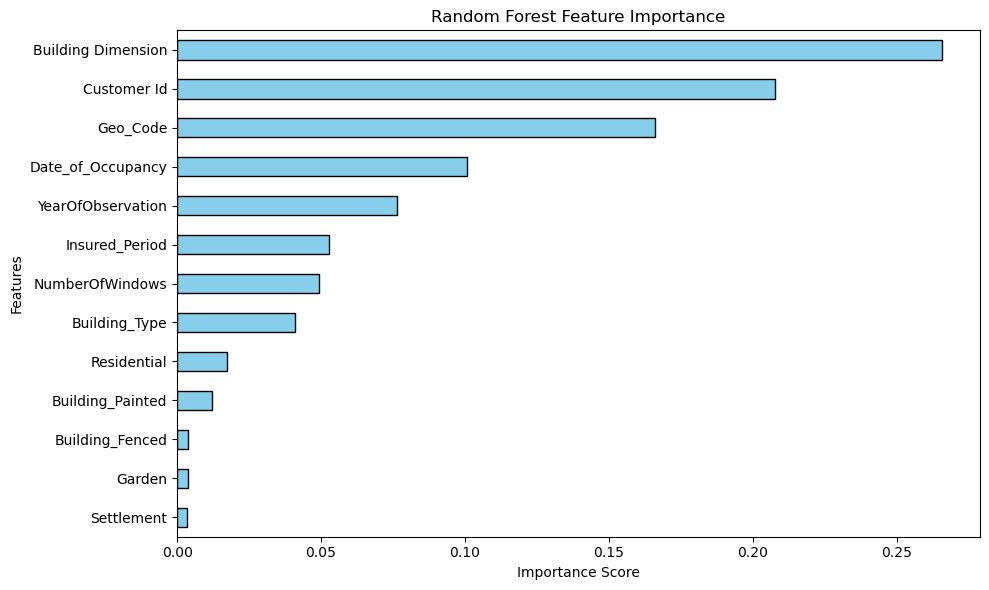

Top Features by Random Forest:
Building Dimension    0.265574
Customer Id           0.207770
Geo_Code              0.165932
Date_of_Occupancy     0.100806
YearOfObservation     0.076444
Insured_Period        0.052865
NumberOfWindows       0.049415
Building_Type         0.040767
Residential           0.017385
Building_Painted      0.011986
Building_Fenced       0.003842
Garden                0.003710
Settlement            0.003505
dtype: float64


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Assuming df is already defined
# Example: df = pd.read_csv("your_data.csv")

# Check if the promotion column exists
claim_cols = [col for col in df.columns if "claim" in col.lower()]
if not claim_cols:
    raise ValueError("No claim column found in the DataFrame.")
claim_col = claim_cols[0]

# Prepare features (X) and label (y)
X = df.drop(claim_col, axis=1)
y = df[claim_col]

# Handle missing values (if any)
X.fillna(method='ffill', inplace=True)  # Forward fill; adjust as needed

# Encode categorical columns
cat_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    if X[col].notnull().any():  # Check if column has non-null values
        X[col] = le.fit_transform(X[col])

# Train Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X, y)

# Feature Importance
importances = rf.feature_importances_
features = pd.Series(importances, index=X.columns)

plt.figure(figsize=(10, 6))
features.sort_values().plot(
    kind='barh',
    title="Random Forest Feature Importance",
    color='skyblue',
    edgecolor='black'
)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Print Ranked Features
print("Top Features by Random Forest:")
print(features.sort_values(ascending=False))

In [86]:
import pandas as pd
df = pd.read_csv("train data.csv")

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

claim_col = [col for col in df.columns if "claim" in col.lower()][0]
print("Target column detected:", claim_col)

X = df.drop(columns=[claim_col])
y = df[claim_col]

cat_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
print("Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Target column detected: Claim
Shapes:
X_train: (5728, 13)
X_test: (1432, 13)
y_train: (5728,)
y_test: (1432,)


In [88]:
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (5728, 13)
Testing Set Shape: (1432, 13)


In [93]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('classifier', LogisticRegression())])

In [103]:
## Convert numpy arrays back to DataFrames (if needed)
import pandas as pd

# If X_train is a numpy array, convert it
if isinstance(X_train, np.ndarray):
    print("Converting numpy arrays to DataFrames...")
    X_train = pd.DataFrame(X_train)
    X_test = pd.DataFrame(X_test)

# Now fill NaN
X_train_filled = X_train.fillna(X_train.median())
X_test_filled = X_test.fillna(X_train.median())

# OR simpler: Handle NaN directly in numpy
import numpy as np

# Replace NaN with median
X_train_filled = np.nan_to_num(X_train, nan=np.nanmedian(X_train, axis=0))
X_test_filled = np.nan_to_num(X_test, nan=np.nanmedian(X_train, axis=0))

# Train model
model = LogisticRegression()
model.fit(X_train_filled, y_train)
y_pred = model.predict(X_test_filled)

Converting numpy arrays to DataFrames...


In [104]:
# ONE-LINE FIX: Fill missing values before training

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# FIX: Fill NaN values with median (for numeric) or mode (for categorical)
X_train_filled = X_train.fillna(X_train.median(numeric_only=True))
X_test_filled = X_test.fillna(X_train.median(numeric_only=True))  # Use training median!

# Check if filled
print(f"Missing in X_train: {X_train.isnull().sum().sum()}")
print(f"Missing in X_train_filled: {X_train_filled.isnull().sum().sum()}")

# Now train and predict
model = LogisticRegression()
model.fit(X_train_filled, y_train)
y_pred = model.predict(X_test_filled)

print("✅ Model trained and predictions made!")

Missing in X_train: 0
Missing in X_train_filled: 0
✅ Model trained and predictions made!


In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1105
           1       0.58      0.15      0.24       327

    accuracy                           0.78      1432
   macro avg       0.69      0.56      0.55      1432
weighted avg       0.74      0.78      0.73      1432



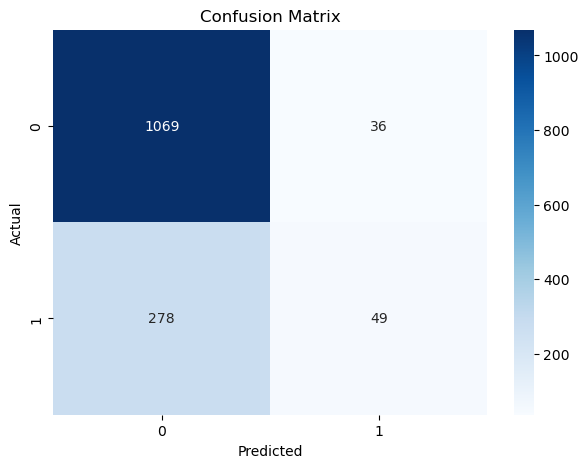

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Get actual class labels
labels = sorted(y_test.unique())

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [111]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n", conf_mat)

class_labels = [0, 1]  # Not Claim, Claim

for i, label in enumerate(class_labels):
    TP = conf_mat[i, i]
    FP = conf_mat[:, i].sum() - TP
    FN = conf_mat[i, :].sum() - TP
    TN = conf_mat.sum() - (TP + FP + FN)

    print(f"\nClass {label} ({'Claim' if label == 1 else 'Not Claim'}):")
    print(f"  TP: {TP}")
    print(f"  FP: {FP}")
    print(f"  FN: {FN}")
    print(f"  TN: {TN}")


Confusion Matrix:
 [[1063   42]
 [ 267   60]]

Class 0 (Not Claim):
  TP: 1063
  FP: 267
  FN: 42
  TN: 60

Class 1 (Claim):
  TP: 60
  FP: 42
  FN: 267
  TN: 1063


In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
df = pd.read_csv("train data.csv")
df.columns = df.columns.str.strip()

# Detect target column automatically
target_col = [col for col in df.columns if "claim" in col.lower()][0]

# Split features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode categoricals
cat_cols = X.select_dtypes(include="object").columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# Scale data
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest + GridSearch
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring="accuracy"
)

grid_search.fit(X_train, y_train)

# Retrieve the BEST model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred = best_rf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy Score: 0.784217877094972

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1105
           1       0.59      0.18      0.28       327

    accuracy                           0.78      1432
   macro avg       0.69      0.57      0.58      1432
weighted avg       0.75      0.78      0.74      1432



In [120]:
import pandas as pd

df = pd.read_csv("Train data.csv")

# Drop identifier (never useful for prediction)
df = df.drop(columns=['Customer Id'], errors='ignore')

X = df.drop("Claim", axis=1)
y = df["Claim"]

In [121]:
from sklearn.preprocessing import LabelEncoder

cat_cols = X.select_dtypes(include='object').columns

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [124]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "random_state": 42,
        "n_jobs": -1
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("✔ Best Parameters:")
print(study.best_params)

from sklearn.metrics import classification_report, accuracy_score

best_params = study.best_params
best_params.update({
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "random_state": 42,
    "n_jobs": -1
})

final_model = XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

[I 2026-01-13 17:47:06,797] A new study created in memory with name: no-name-bbf87cc0-ac38-462b-90dc-f6d1fd8ac493
[I 2026-01-13 17:47:08,084] Trial 0 finished with value: 0.7870111731843575 and parameters: {'n_estimators': 419, 'max_depth': 5, 'learning_rate': 0.04451937493603096, 'subsample': 0.6745402807409603, 'colsample_bytree': 0.9318189568225906, 'gamma': 3.1998946840248923, 'reg_alpha': 1.8653816388239215, 'reg_lambda': 2.359491932745504}. Best is trial 0 with value: 0.7870111731843575.
[I 2026-01-13 17:47:08,985] Trial 1 finished with value: 0.7835195530726257 and parameters: {'n_estimators': 553, 'max_depth': 5, 'learning_rate': 0.08715753936069129, 'subsample': 0.9292344402001669, 'colsample_bytree': 0.6208421856745897, 'gamma': 4.120745596627543, 'reg_alpha': 3.202398250396263, 'reg_lambda': 0.6530416444726844}. Best is trial 0 with value: 0.7870111731843575.
[I 2026-01-13 17:47:09,845] Trial 2 finished with value: 0.7828212290502793 and parameters: {'n_estimators': 642, 'ma

✔ Best Parameters:
{'n_estimators': 456, 'max_depth': 5, 'learning_rate': 0.14500150465726713, 'subsample': 0.8049855579275836, 'colsample_bytree': 0.7477706173992594, 'gamma': 2.4639358604532067, 'reg_alpha': 4.081657992874266, 'reg_lambda': 4.665253319875523}
Final Accuracy: 0.7877094972067039

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.87      1105
           1       0.60      0.22      0.32       327

    accuracy                           0.79      1432
   macro avg       0.70      0.59      0.60      1432
weighted avg       0.76      0.79      0.75      1432



In [132]:
X = df_prep.drop(columns=["Claim", "Customer Id"])
y = df_prep["Claim"]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)

In [142]:
import optuna
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "random_state": 42,
        "n_jobs": -1
    }

    model = XGBClassifier(**params)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    aucs = []

    for train_idx, val_idx in cv.split(X_processed, y):
        X_train, X_val = X_processed[train_idx], X_processed[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_val)[:, 1]
        aucs.append(roc_auc_score(y_val, y_pred))

    return np.mean(aucs)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best AUC:", study.best_value)
print("Best Parameters:")
print(study.best_params)

best_params = study.best_params
best_params.update({
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "random_state": 42,
    "n_jobs": -1
})

final_xgb_model = XGBClassifier(**best_params)
final_xgb_model.fit(X_processed, y)

[I 2026-01-13 18:22:35,116] A new study created in memory with name: no-name-b6f158e0-d05c-4a5c-bb61-71d98fe67aa7
[I 2026-01-13 18:22:41,624] Trial 0 finished with value: 0.709925408429198 and parameters: {'n_estimators': 554, 'max_depth': 8, 'learning_rate': 0.1814845315406617, 'subsample': 0.6102523006096607, 'colsample_bytree': 0.8736526806542297, 'gamma': 2.2423987410800295, 'reg_alpha': 3.781334179176964, 'reg_lambda': 0.6251554966084377}. Best is trial 0 with value: 0.709925408429198.
[I 2026-01-13 18:22:44,908] Trial 1 finished with value: 0.715107745047121 and parameters: {'n_estimators': 334, 'max_depth': 6, 'learning_rate': 0.17025603290036018, 'subsample': 0.6056948183537064, 'colsample_bytree': 0.8069005539577634, 'gamma': 4.574399923858769, 'reg_alpha': 1.0558770804003852, 'reg_lambda': 1.4859273119609795}. Best is trial 1 with value: 0.715107745047121.
[I 2026-01-13 18:22:53,222] Trial 2 finished with value: 0.7149254579373776 and parameters: {'n_estimators': 538, 'max_de

Best AUC: 0.7184997477430838
Best Parameters:
{'n_estimators': 299, 'max_depth': 7, 'learning_rate': 0.06146332463738825, 'subsample': 0.6530055670980222, 'colsample_bytree': 0.6494874283162448, 'gamma': 4.848268144638885, 'reg_alpha': 2.952045122912294, 'reg_lambda': 2.5888671133967485}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6494874283162448, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, feature_weights=None,
              gamma=4.848268144638885, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06146332463738825,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=299, n_jobs=-1,
              num_parallel_tree=None, ...)

In [141]:
import pandas as pd

feature_names = (
    preprocessor.named_transformers_["cat"]
    .get_feature_names_out(cat_cols)
    .tolist() + num_cols.tolist()
)

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": final_xgb_model.feature_importances_
}).sort_values("Importance", ascending=False)

importance_df.head(10)

,Feature,Importance
1331,Building Dimension,0.143526
4,Garden_O,0.065724
5,Garden_V,0.056552
17,NumberOfWindows_8,0.051632
1332,Building_Type,0.049066
1329,Insured_Period,0.042184
12,NumberOfWindows_3,0.040986
1333,Building_Age,0.035949
1330,Residential,0.035485
11,NumberOfWindows_2,0.035061


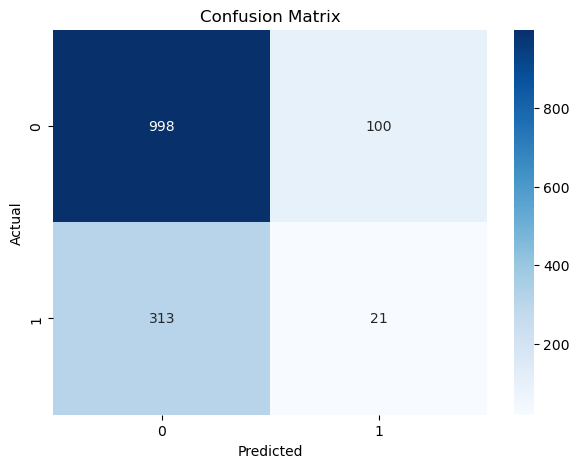

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [159]:
print("Missing values per column:")
print(X_train.isna().sum())

Missing values per column:
YearOfObservation       0
Insured_Period          0
Residential             0
Building Dimension     86
Building_Type           0
Date_of_Occupancy     411
dtype: int64


In [161]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]

X_test = X_test.dropna()
y_test = y_test[X_test.index]

In [163]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(multi_class='ovr', solver='liblinear')
logistic_model.fit(X_train, y_train)


LogisticRegression(multi_class='ovr', solver='liblinear')

In [164]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# Pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(multi_class='ovr', solver='liblinear'))
])

clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier',
                 LogisticRegression(multi_class='ovr', solver='liblinear'))])

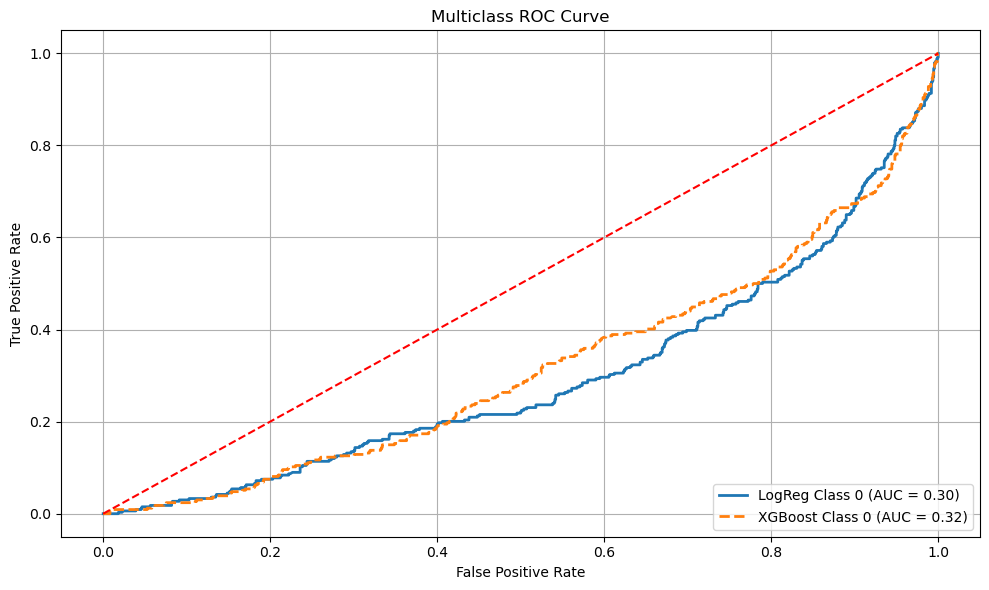

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# 🧠 Recreate and fit the logistic model (if not already done)
logistic_model = LogisticRegression(multi_class='ovr', solver='liblinear')  # use 'ovr' for predict_proba to work
logistic_model.fit(X_train, y_train)

# 🧠 Fit the XGBoost model (if not already done)
from xgboost import XGBClassifier
final_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
final_model.fit(X_train, y_train)

# ✅ Binarize true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

# ✅ Get predicted probabilities for each class
log_proba_bin = logistic_model.predict_proba(X_test)
xgb_proba_bin = final_model.predict_proba(X_test)

# 🎨 Plot ROC for each class
plt.figure(figsize=(10, 6))

for i in range(n_classes):
    fpr_log, tpr_log, _ = roc_curve(y_test_bin[:, i], log_proba_bin[:, i])
    auc_log = auc(fpr_log, tpr_log)

    fpr_xgb, tpr_xgb, _ = roc_curve(y_test_bin[:, i], xgb_proba_bin[:, i])
    auc_xgb = auc(fpr_xgb, tpr_xgb)

    plt.plot(fpr_log, tpr_log, lw=2, label=f'LogReg Class {i} (AUC = {auc_log:.2f})')
    plt.plot(fpr_xgb, tpr_xgb, lw=2, linestyle='--', label=f'XGBoost Class {i} (AUC = {auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [182]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

# 2️⃣ Prepare data
# Replace 'Claim' with your target column
X = df.drop(columns=['Claim'])
y = df['Claim']

#Drop obvious ID columns automatically
id_cols = [col for col in X.columns if 'id' in col.lower() or 'number' in col.lower()]
X = X.drop(columns=id_cols)

#Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(exclude=['number']).columns.tolist()

# Preprocessing pipelines
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

#Define models
models = {
    "Logistic Regression": LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

#Evaluation function
def evaluate_model(model, X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []
    aucs = []

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Create a pipeline: preprocessing + model
        clf = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        y_prob = clf.predict_proba(X_val)[:, 1]

        accuracies.append(accuracy_score(y_val, y_pred))
        aucs.append(roc_auc_score(y_val, y_prob))

    return {
        "accuracy": sum(accuracies)/len(accuracies),
        "roc_auc": sum(aucs)/len(aucs)
    }

#Run evaluation
results = []

for name, model in models.items():
    metrics = evaluate_model(model, X, y)
    results.append({"Model": name, **metrics})

#Display results
results_df = pd.DataFrame(results)
print(results_df)

                 Model  accuracy   roc_auc
0  Logistic Regression  0.784218  0.709319
1        Random Forest  0.771927  0.675395
2              XGBoost  0.781285  0.700266


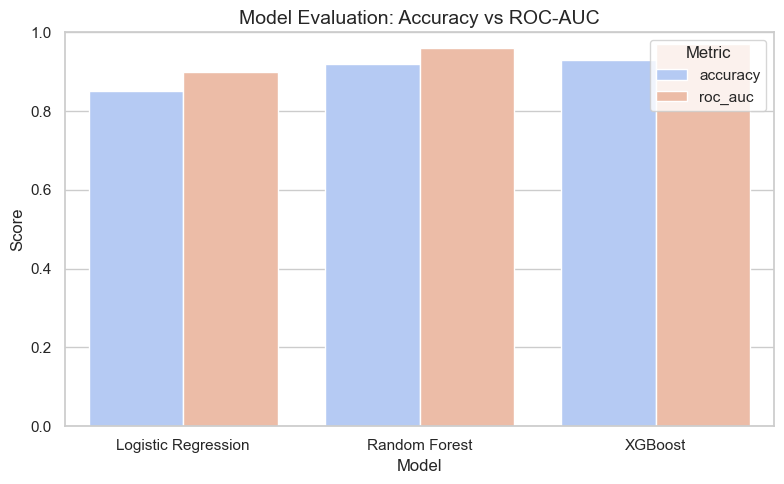

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example results (replace with your actual results_df)
results_df = pd.DataFrame([
    {"Model": "Logistic Regression", "accuracy": 0.85, "roc_auc": 0.90},
    {"Model": "Random Forest", "accuracy": 0.92, "roc_auc": 0.96},
    {"Model": "XGBoost", "accuracy": 0.93, "roc_auc": 0.97}
])

# Melt dataframe for seaborn plotting
results_melted = results_df.melt(id_vars='Model', value_vars=['accuracy', 'roc_auc'],
                                 var_name='Metric', value_name='Score')

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

# Barplot
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric', palette='coolwarm')

# Add labels
plt.ylim(0, 1)
plt.title("Model Evaluation: Accuracy vs ROC-AUC", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.tight_layout()

# Show image
plt.show()

In [187]:
import joblib
joblib.dump(xgb_model, "xgb_insurance_claim_model.pkl")

['xgb_insurance_claim_model.pkl']